In [2]:
import os
import glob
import shutil
from kalpana.downscaling import runStatic
from IPython.display import display, Image

Idem to example  ```03_*``` but in this case we will use a shapefile with the levee system of
Louisiana to block the horizontal expansion of the flooding. <br>
The input files are not included because are not property of the [CCHT](https://ccht.ccee.ncsu.edu/), SO THIS NOTEBOOK WON'T WORK.

The only change compare to ```03_static_downscaling_full_workflow.ipynb``` is line 72 in the cell below

In [4]:
## full path of the maxele file
ncFile = r'maxele.63.nc'
## contour levels to use in the downscaling
## from 0 to 11 (included) every 1
levels = [0,10, 1]
## output CRS
epsgOut = 6344
## full path for the shape file with the maxele contours
## same path is used for saving rasters and the grass location
pathOut = r'maxele_katrina.shp'
## version of grass 8.2 and 8.3 works
grassVer = 8.2
## path of the downscaling rasters
pathRasFiles = r'../../adds/inputs_examples'
## rasters filenames, can be a list if more than one. 
## 'all' for importing ALL THE FILES in pathRasFiles 
rasterFiles = 'NGMconedRes10m.tif'
## full path of the raster with the mesh element size
meshFile = r'../..'
## crs of adcirc output (default value)
epsgIn = 4326
## vertical unit of the maxele
vUnitIn = 'm'
## vertical unit of the downscaled water levels
vUnitOut = 'm'
## name of the maxele variable to downscale. Always 'zeta_max' for downscaling
var = 'zeta_max'
## contours type. Always 'polygon' for downscaling
conType = 'polygon'
## full path of file (kml, kmz, shp, gpkg or tif) to crop the domain.
## in this case we will use the same downscaling raster bounding box as the subdomain
subDomain = os.path.join(pathRasFiles, rasterFiles)
## epsg code or crs of the subDomain. In this case, as we are using the downscaling dem bounding box
## as the subdomain, the same epsg code must be specified.
epsgSubDom = 6344
## boolean for exporting the mesh as a shape file from maxele, not necessary in this
## case since mesh was exported as preprocess. In example_03 it is exported.
exportMesh = False
## full path of pickle file with vertical datum differences for all mesh nodes
## proprocess step
dzFile = None
## threshold to do apply the vertical datum difference, below -20 vyperdatum gives weird
## results
zeroDif = -20
## only tide stations closed than this threshold are used to interpolate the vertical datum difference
distThreshold = 1
## number of points to query for the inverse distance-weighted interpolation
k = 7
## full path of the grass location if a existing one will be used
## if None a new location called 'grassLoc' is created. A new location is created in
## example_03
nameGrassLocation = None
## Boolean for creating grass location, in this example it was created as a preprocess
## step. In example_03 it is created.
createGrassLocation = True
## Method for assigning the crs to the grass location. Default and faster option
createLocMethod = 'from_raster'
## variable to downscale, can be 'zMax', 'zMean' and 'zMin'. With 'zMean', the mean value
## of each contour is used.
attrCol = 'zMean'
## how many times the representative length the results are grown in the downscaling
repLenGrowing = 1.0 
## remove wet cells with water level below the ground surface
compAdcirc2dem = True
## transform the water level to water depth
floodDepth = False
## export downscaled results as shape files. Slows down the process a couple of minutes
ras2vec = False
## boolean for exporing raw maxele as a DEM. Useful for debugging
exportOrg = False
## full path of the shapefile with levees
leveesFile = r'../../adds/levees_louisiana/louisiana-levees-lines.shp'
## boolean for reprojecting the downscaled dem back to lat/lon
finalOutToLatLon = False

In [5]:
#################### calling downscaling
runStatic(ncFile, levels, epsgOut, pathOut, grassVer, pathRasFiles, rasterFiles, meshFile, epsgIn=epsgIn, 
                                 vUnitIn=vUnitIn, vUnitOut=vUnitOut, var=var, conType =conType, subDomain=subDomain, epsgSubDom=epsgSubDom, 
                                 exportMesh= exportMesh, dzFile=dzFile, zeroDif=-zeroDif, distThreshold=distThreshold, k=k, 
                                 nameGrassLocation=nameGrassLocation, reateGrassLocation=createGrassLocation, createLocMethod=createLocMethod, 
                                 attrCol=attrCol, epLenGrowing=repLenGrowing, compAdcirc2dem=compAdcirc2dem, floodDepth=floodDepth, 
                                 ras2vec=ras2vec, exportOrg=exportOrg, leveesFile = leveesFile, finalOutToLatLon=finalOutToLatLon)

2024-06-20 21:11:18.495 | INFO     | kalpana.export:nc2shp:817 - Start exporting adcirc to shape
2024-06-20 21:11:18.515 | INFO     | kalpana.export:filledContours2gpd:311 - Begin computing contours using Dask
2024-06-20 21:11:18.522 | INFO     | kalpana.export:filledContours2gpd:313 - Finnished computing contours using Dask
2024-06-20 21:11:18.526 | INFO     | kalpana.export:nc2shp:847 -     Ready with the contours extraction: 0.000 min
2024-06-20 21:11:18.550 | INFO     | kalpana.export:nc2shp:855 -     Cliping contours based on mask: 0.000 min
2024-06-20 21:11:18.557 | INFO     | kalpana.export:nc2shp:873 -     Changing CRS: 0.000 min
2024-06-20 21:11:18.571 | INFO     | kalpana.export:nc2shp:884 -     Saving file: 0.000 min
2024-06-20 21:11:18.571 | INFO     | kalpana.export:nc2shp:888 -     Exporting mesh
2024-06-20 21:11:18.761 | INFO     | kalpana.export:nc2shp:896 -     Mesh exported: 0.003 min
2024-06-20 21:11:18.762 | INFO     | kalpana.export:nc2shp:897 - Ready with exportin

Kalpana removes the water on top of the levees and only keeps the downscaled cells if they intersect the original ADCIRC flooded area (more detail [here](https://repository.lib.ncsu.edu/items/cb11dd56-045f-4e91-a4d9-2b9e566423d8))<br>
The images below show the downscaling result without and with considering the levees system. In the second example the water beyond the levee is not removed because it intersects the original flooding of the ADCIRC result

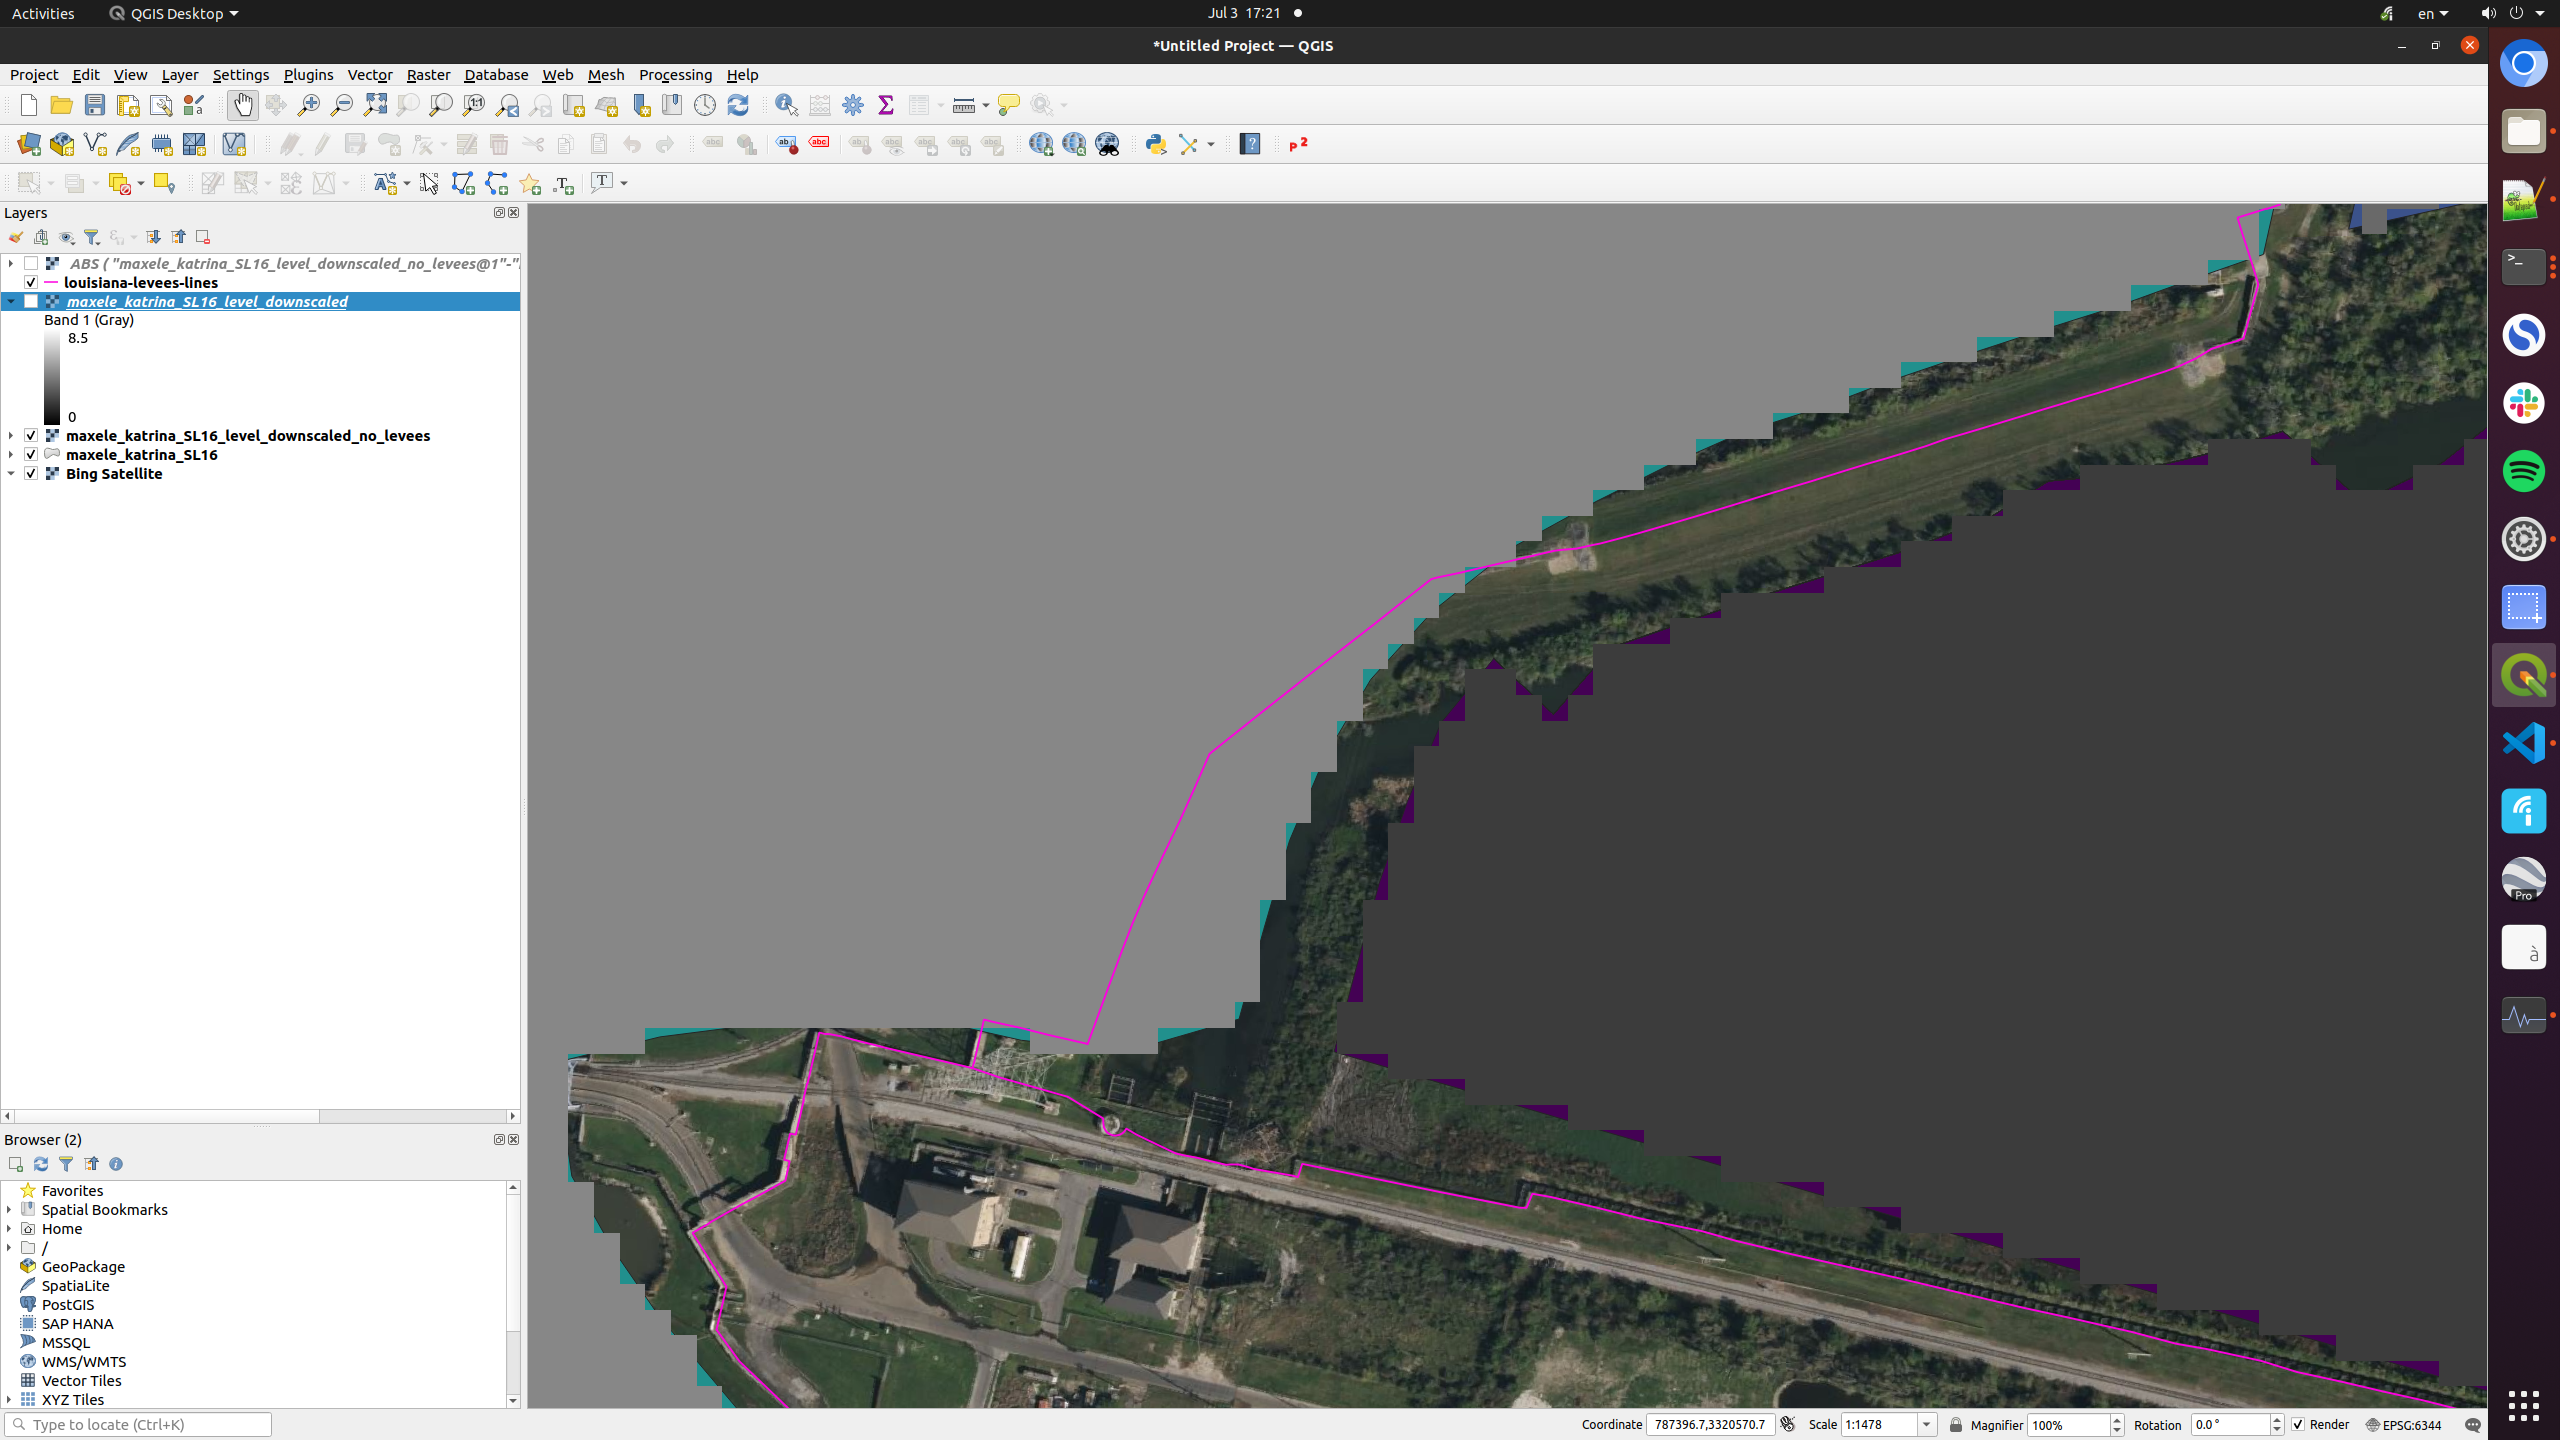

In [5]:
display(Image(filename=r'../../adds/imgs/no_levees.png', width = 712))

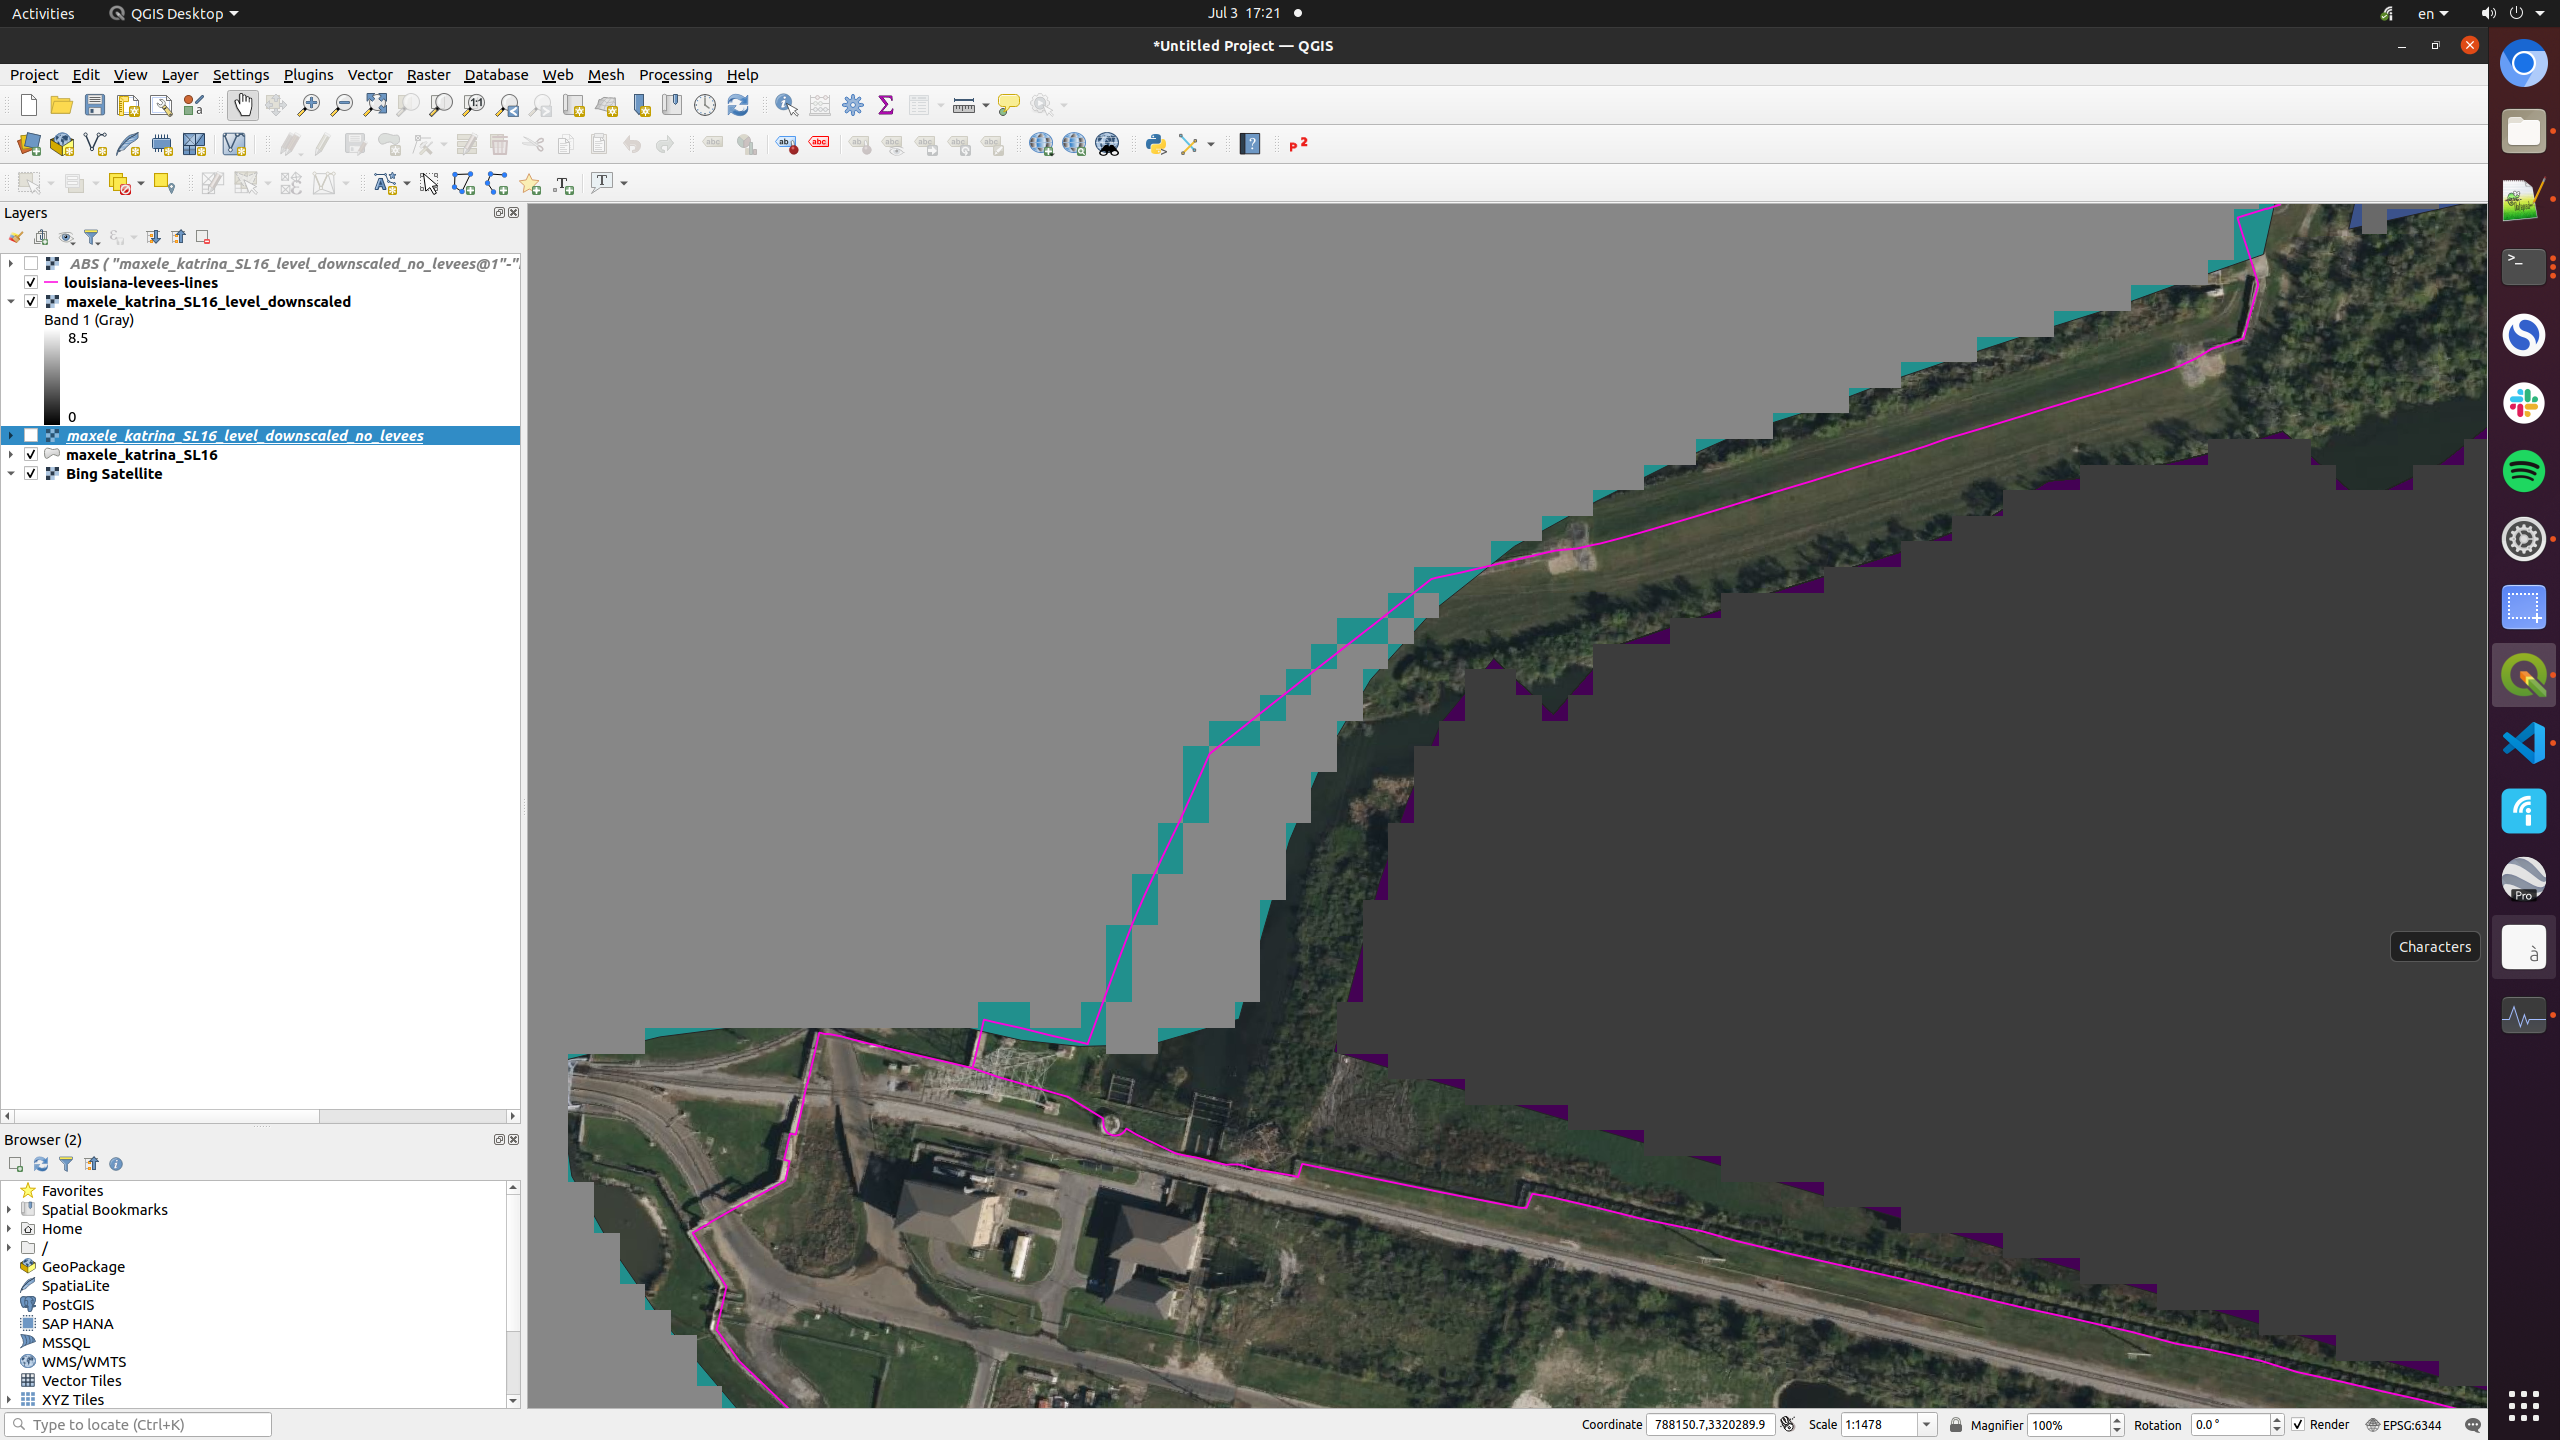

In [3]:
display(Image(filename=r'../../adds/imgs/levees.png', width = 712))